# Exploratory Visual Analysis
1. Caloric Distributions
2. Macro distribution (normalized to 500 calories)
3. Normalized For Calories, What is the restaurant that best allows you to fulfill the USDA nutrient suggestions?
4. What nutrient to different restaurants over-index towards? How can we compare nutrition across two restaurants?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/J/Desktop/Businesses/Meal_Maker/Scraped_Data/combined_nutrition_small/nutrition_sm_processed_ss.csv',dtype = {'food_key':int,'ingredients_list':object}, encoding='ISO-8859-1')

In [17]:
df['serving_size_val'][df['serving_size_val']==max(df['serving_size_val'])] =1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df.to_csv('C:/Users/J/Desktop/Businesses/Meal_Maker/Scraped_Data/combined_nutrition_small/nutrition_sm_processed_ss.csv', index=False)

In [3]:
df = df.fillna(0)

In [8]:
nut_reqs = pd.read_csv('C:/Users/J/Fitness/Meal Plans/num_reqs_df.csv')

## Caloric Distributions
In creating a meal plan, n number of meal plans must fit together. Knowing the distribution of calories by food can shed light on how many food items will be needed for a single plan.

Normali

In [5]:
np.min(df['calories'])

0.0

In [19]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,100000]

In [13]:
cal_vec = df['calories'].astype(int)

In [22]:
cal_vec

0          211
1          205
2          702
3         1353
4          672
5          821
6          474
7          649
8          661
9          665
10         739
11         318
12         684
13         391
14        1015
15         210
16         740
17         798
18         886
19         862
20        1033
21        1173
22         760
23         153
24         204
25         658
26         284
27         328
28         405
29         817
          ... 
469798      93
469799      96
469800      84
469801      89
469802      90
469803      88
469804       0
469805     903
469806    1035
469807      77
469808     446
469809     120
469810     940
469811     880
469812     165
469813     220
469814     101
469815     113
469816     150
469817     252
469818     390
469819     588
469820       2
469821       3
469822     850
469823     424
469824     708
469825     500
469826     313
469827     672
Name: calories, dtype: int32

TypeError: slice indices must be integers or None or have an __index__ method

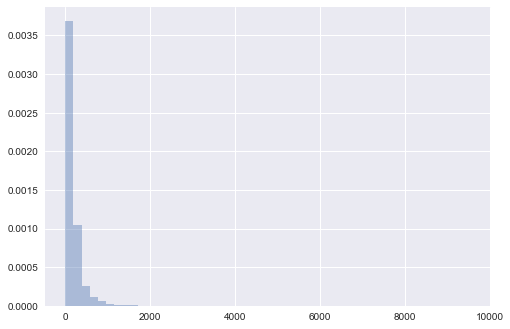

In [21]:
sns.distplot(cal_vec)

My Macro Proportions

([<matplotlib.axis.XTick at 0x566402e8>,
 <a list of 3 Text xticklabel objects>)

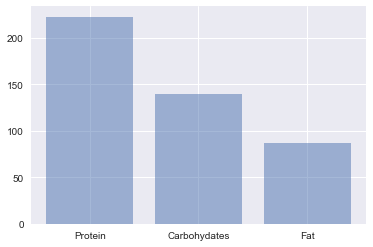

In [47]:
plt.bar(np.arange(3), [nut_reqs['protein_g'].item(), nut_reqs['carb_g'].item(), nut_reqs['fat_g'].item()], align='center', alpha=.5)
plt.xticks(np.arange(3), ['Protein', 'Carbohydates', 'Fat'])

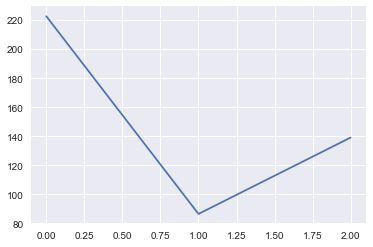

In [23]:
plt.plot([nut_reqs['protein_g'], nut_reqs['fat_g'], nut_reqs['carb_g']])

In [ ]:
plt.plot()

In [48]:
df['reqs_dist'] = abs(df['protein_g']-nut_reqs['protein_g'].item())+abs(df['fat_g']-nut_reqs['fat_g'].item())+abs(df['carb_g']-nut_reqs['carb_g'].item())

Closest To Macros

In [51]:
df.sort(['reqs_dist'], ascending=True)[0:5][['brand', 'food_description']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,brand,food_description
28285,McDonald's,"Buttermilk Crispy Chicken Tenders Feast, 20 pi..."
27391,Lou Malnati's,Chicken Louie Pasta
43337,Samuel Mancino's Italian Eatery,"Samuel Mancino Club Grinder, 16-Inch Whole San..."
173989,Cheesecake Factory,Miso Salmon (Lunch Portion)
43410,Samuel Mancino's Italian Eatery,"Tuna Grinder, 16-Inch Whole Sandwich"


Most nutritious single food

TypeError: slice indices must be integers or None or have an __index__ method

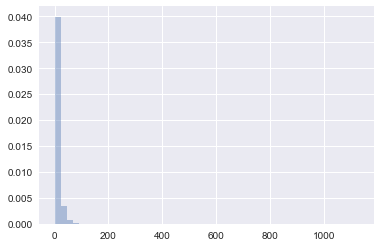

In [18]:
sns.distplot()

In [7]:
df.head()

,food_key,food_description,brand,food_type_grp,source,ingredients_list,serving_size_raw,serving_size_val,serving_size_unit,calories,...,saturated_fat_g,carb_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,calcium_mg,iron_mg,vit_a_mcg,vit_c_mg
0,234617,"Egg Cream, Chocolate flavored",5 & Diner,restaurant,diet_facts_restaurants,NaN,1 egg cream,1.0,egg cream,211.0,...,1.50,42.87,0.00,6.50,191.41,12.50,180.0,2.16,250.0,1.2
1,234618,"Egg Cream, Vanilla flavored",5 & Diner,restaurant,diet_facts_restaurants,NaN,1 egg cream,1.0,egg cream,205.0,...,1.50,44.50,0.00,44.50,85.00,12.50,180.0,0.00,250.0,1.2
2,234619,Eggs Benedict,5 & Diner,restaurant,diet_facts_restaurants,two poached eggs on top of sliced ham and an E...,1 order,1.0,order,702.0,...,24.12,36.44,1.35,10.01,1864.89,562.57,220.0,4.14,2000.0,21.0
3,234620,Eggs Maximilian with Chorizo,5 & Diner,restaurant,diet_facts_restaurants,NaN,1 order,1.0,order,1353.0,...,27.58,75.24,6.30,6.98,2033.99,751.81,440.0,7.38,4150.0,79.2
4,234621,Fish and Chips,5 & Diner,restaurant,diet_facts_restaurants,"battered cod served with French fries, corn on...",1 order,1.0,order,672.0,...,1.09,77.55,1.08,0.94,1904.20,109.72,140.0,4.86,650.0,3.6


Word most associated with protein, sugar? - Bag of Words / One hot encoding at about +25

In [ ]:
Do restaurant meals have too much sodium?

In [ ]:
One-hot encoding 